In [2]:
import pandas 

import matplotlib.pyplot
import seaborn

from scipy.stats import ranksums

from utils import parse_interactome, parse_causal_genes

/home/kubicaj/python_venvs/pyEnv_PPI/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [3]:
def parse_scores(scores_file, causal_genes):
    # load scores
    scores = {}

    with open(scores_file, 'r') as f:
        # skip header
        next(f)

        data = f.read().splitlines()
        for line in data:
            line_splitted = line.split('\t')
            gene, score = line_splitted
            # skip causal genes
            if causal_genes.get(gene) == 1:
                continue
            scores[gene] = float(score)

    return scores

In [4]:
def parse_leave_one_out(scores_file):
    # load left-out scores
    scores_left_out = {}

    with open(scores_file, 'r') as f:
        # skip header
        next(f)

        data = f.read().splitlines()
        for line in data:
            line_splitted = line.split('\t')
            gene, score = line_splitted
            scores_left_out[gene] = float(score)
        
    return scores_left_out

In [5]:
def concatenate_scores(scores, scores_left_out):
    df_scores = pandas.DataFrame.from_dict(scores, 
                                       orient='index', 
                                       columns=['score'])
    df_scores['group'] = "non-causal"

    df_scores_left_out = pandas.DataFrame.from_dict(scores_left_out, 
                                                    orient='index', 
                                                    columns=['score'])

    df_scores_left_out['group'] = 'left-out'

    # concatenate dataframes for comparison
    df_compare = pandas.concat([df_scores, df_scores_left_out])

    stat, p_value = ranksums(df_scores['score'].values, df_scores_left_out['score'].values)

    return df_compare, p_value

#### Load and parse the necessary data

In [6]:
PHENOTYPE = "MMAF"

In [7]:
interactome, genes = parse_interactome(interactome_file="/home/kubicaj/calc/input/Interactome_human.sif")

causal_genes = parse_causal_genes(causal_genes_file="/home/kubicaj/calc/input/causalGenes_allPhenotypes.csv",
                                  canonical_genes_file="/home/kubicaj/calc/input/canonicalGenes.tsv",
                                  genes=genes)

#### Analyze leave-one-out results: newCentrality_v4.py d=5

In [62]:
scores = parse_scores("/home/kubicaj/calc/output/scores.tsv", causal_genes)

In [43]:
scores_left_out = parse_leave_one_out("/home/kubicaj/calc/output/leave_one_out/left_out_scores.tsv")

In [49]:
df_compare, p_value = concatenate_scores(scores, scores_left_out)

(0.0, 0.01)

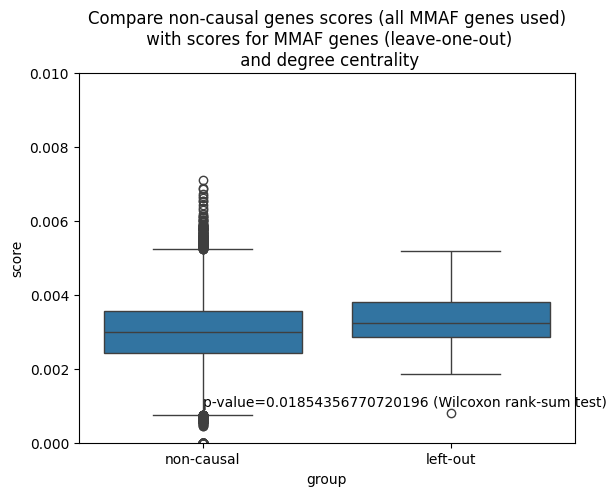

In [50]:
# plot
seaborn.boxplot(data=df_compare, x='group', y='score')
matplotlib.pyplot.text(0, 0.001, s=f"p-value={p_value} (Wilcoxon rank-sum test)")
matplotlib.pyplot.title(f"Compare non-causal genes scores (all {PHENOTYPE} genes used)\n with scores for {PHENOTYPE} genes (leave-one-out)\n and degree centrality")
matplotlib.pyplot.ylim(0, 0.01)

#### Analyze leave-one-out results: newCentrality_v4.py d=10

In [63]:
scores = parse_scores("/home/kubicaj/calc/output/scores_d10.tsv", causal_genes)

In [52]:
scores_left_out = parse_leave_one_out("/home/kubicaj/calc/output/leave_one_out_d10/left_out_scores.tsv")

In [53]:
df_compare, p_value = concatenate_scores(scores, scores_left_out)

(0.0, 0.01)

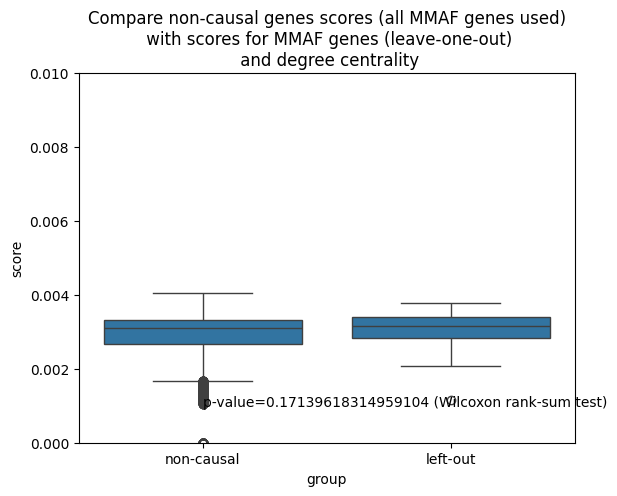

In [54]:
# plot
seaborn.boxplot(data=df_compare, x='group', y='score')
matplotlib.pyplot.text(0, 0.001, s=f"p-value={p_value} (Wilcoxon rank-sum test)")
matplotlib.pyplot.title(f"Compare non-causal genes scores (all {PHENOTYPE} genes used)\n with scores for {PHENOTYPE} genes (leave-one-out)\n and degree centrality")
matplotlib.pyplot.ylim(0, 0.01)

#### Analyze leave-one-out results: pageRankCentrality.py d=5

In [64]:
scores = parse_scores("/home/kubicaj/calc/output/scores_pageRank.tsv", causal_genes)

In [58]:
scores_left_out = parse_leave_one_out("/home/kubicaj/calc/output/leave_one_out_pageRank/left_out_scores.tsv")

In [59]:
df_compare, p_value = concatenate_scores(scores, scores_left_out)

(0.0, 0.01)

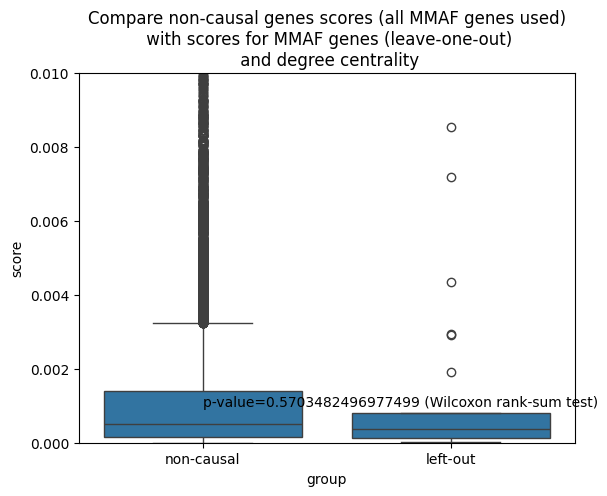

In [60]:
# plot
seaborn.boxplot(data=df_compare, x='group', y='score')
matplotlib.pyplot.text(0, 0.001, s=f"p-value={p_value} (Wilcoxon rank-sum test)")
matplotlib.pyplot.title(f"Compare non-causal genes scores (all {PHENOTYPE} genes used)\n with scores for {PHENOTYPE} genes (leave-one-out)\n and degree centrality")
matplotlib.pyplot.ylim(0, 0.01)

#### Analyze leave-one-out results: pageRankCentrality.py d=10

In [8]:
scores = parse_scores("/home/kubicaj/calc/output/scores_pageRank_d10.tsv", causal_genes)

In [9]:
scores_left_out = parse_leave_one_out("/home/kubicaj/calc/output/leave_one_out_pageRank_d10/left_out_scores.tsv")

In [10]:
df_compare, p_value = concatenate_scores(scores, scores_left_out)

(0.0, 0.01)

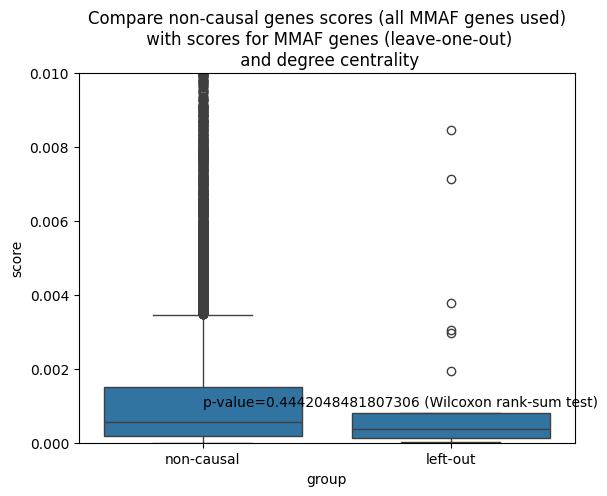

In [11]:
# plot
seaborn.boxplot(data=df_compare, x='group', y='score')
matplotlib.pyplot.text(0, 0.001, s=f"p-value={p_value} (Wilcoxon rank-sum test)")
matplotlib.pyplot.title(f"Compare non-causal genes scores (all {PHENOTYPE} genes used)\n with scores for {PHENOTYPE} genes (leave-one-out)\n and degree centrality")
matplotlib.pyplot.ylim(0, 0.01)

#### Analyze degree centrality

In [7]:
# load scores
scores_DC = {}

with open(f"scores_DC.tsv", 'r') as f:
    # skip header
    next(f)

    data = f.read().splitlines()
    for line in data:
        line_splitted = line.split('\t')
        gene, score = line_splitted
        # skip causal genes
        if causal_genes.get(gene) == 0:
            continue
        scores_DC[gene] = float(score)

#### Analyze betweenness centrality

In [8]:
# load scores
scores_BC = {}

with open(f"scores_BC.tsv", 'r') as f:
    # skip header
    next(f)

    data = f.read().splitlines()
    for line in data:
        line_splitted = line.split('\t')
        gene, score = line_splitted
        # skip causal genes
        if causal_genes.get(gene) == 0:
            continue
        scores_BC[gene] = float(score)